# Introduction

## A Brief History of Statisical Learning
- Beginning of 19th Century Legendre and Gauss published papers on *method of least squares* earliest form of *linear regression*
- 1936 Fischer proposed *Linear Disciminant Analysis*. In the 1940s various authors put forward an alternative approach *Logistic Regression*.
- In the early 1970s Nelder and Wedderburn coined the term *generalised linear models* for an entire class of statistical learning methods that include both linear and logistic regression as special cases.
- By the end of the 1970s many more techniques were developed but they were almost all exclusively linear, non-linear methods were computationally expensive.
- By the 1980s the necessary processing power was more readily available and Breimann, Friedman, Olshen and Stone introduced *classification and regression trees* and also used *cross-validation* techniques for model selection.
- Hastie and Tibshirani coined the term *generalised additive models* in 1986 for a class of non-linear extensions to generalised linear models. 
- Since this time statistical learning (aka machine learning) has blossomed as an active and productive subject area

## What is Statistical Learning?

### Definition
We take a set of inputs (also known as *predictors*, *independent variables*, *features* and sometimes just *variables*) and use various methods to predict outputs (also known as *response* or *dependent variable*).

### Estimating $f$
More generally suppose there are $p$ different predictors $X_1, X_2, ..., X_p$ and we observe a quantative response $Y$. Our job is to find (based on the assumption, which can be challenged, that it exists) a relationship between $Y$ and $X = (X_1, X_2, ..., X_p)$ which can be written in a general form as

$$ Y = f(X) + \epsilon$$

Here we have an unknown (to be discovered) function $f$ of the input variables $X$ and a random error term $\epsilon$. $f$ represents the systematic information that $X$ provides about $Y$. The errors have a mean of approximately zero.

### Why Estimate $f$?
Two key reasons: *prediction* and *inference*.

#### Prediction
We attempt to predict $Y$ using a function which we *learn* from the data

$$ \hat{Y} = \hat{f}(X)$$

In this situtation $f$ is often treated as a black box.

In general $\hat{f}$ will not be a perfect prediction of $Y$. The accuracy of our prediction $\hat{f}$ depends on two quantities:
- Reducible Error - we can modify $\hat{f}$ by using better statistical learning methods for example
- Irreducible Error - this comes from $\epsilon$. This irreducible error comes from many places: certain variables not measured or available in the data and also unmeasurable variation (e.g. inherent randomness based on say time of day or other uncollected input data, or just inherent randomness).

The expected value of the squared difference 
$$\begin{align*}
E(Y-\hat(Y))^2 &= E( f(X) + \epsilon - \hat{f}(X) )^2\\
&= \underbrace{\left[ f(X) - \hat{f}(X)\right]}_{\text{Reducible}} + \underbrace{\text{Var}(\epsilon)}_{\text{Irreducible}}
\end{align*}$$

Irreducible error will always place an upper bound on the accuracy of our estimates.

#### Inference
Rather than a predictive black box, this is about understanding the relationship between the input variables and the response. 
- Which predictors are associated with the response, which are independent?
- What is the relationship between each predictor and the response (inverse relationship?)?. Are some more influential than others?
- Is the relationship linear or non-linear?

A real world inferential question is something like: "What effect will changing the price of an item have on its sales?". "How much extra will the house be worth with a view of the river?". Highly non-linear models may be great for prediction but provide difficulties for interpretation (see the later section on *The Trade-Off between Prediction Accuracy and Model Interpretability*).

### How we Estimate $f$
We have a set of training data so called because the observations contained in this data will be used to "train" our model to enable accurate predictions. Our goal is to find a statistical learning method and apply it to the training data in order to estimate an unknown function $f$. This estimate is such that $Y \approx \hat{f}(X)$. Broadly most methods for discovering such a function can be categorised as either *parametric* or *non-parametric*.

#### Parametric Methods
Parametric methods invovle a two-step approach:
1. Make an assumption about the *functional form*, or shape, of $f$. For example we could assume it is linear
$$f(X) = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + ... + \beta_p X_p$$
2. After a model has been selected we need a procedure that uses the training data to "fit" or "train" the model. We have **reduced our problem to estimating the parameters that come with our model**.

It is generally much easier to estimate parameters of a particular model rather than attempt to fit an entirely arbitary $f$. 

We have to be careful we do not overfit our data which means our estimate of $f$ too closely follow noise in the training data set.
#### Non-parametric Methods
No explicit assumptions about the functional form of $f$ are made. By avoiding making assumptions about the shape of $f$ non-parametric methods have the potential to more accurately fit the data. The problem is however complicated as we have not reduced it to parameter estimation and often large amounts of training data is required. 

An example would be a *thin-plate spline*.

### The Trade-Off between Prediction Accuracy and Model Interpretability
Linear regression is an inflexible approach meaning only a small range of shapes are available to fit $f$. Other methods are flexible in that they can fit a large range of shapes. 

Inference is helped by restrictive inflexible models as the relationship is more readily understood. Flexible models can be more helpful in "black-box" prediction scenarios (with the awareness that we can actually obtain less accurate predictions with this approach because of overfitting).

### Supervised vs. Unsupervised Learning
Supervised learning is when we have a set of inputs and associated outputs with which we can train our model.

Unsupervised learning is where we have only inputs and no supervising outputs. Our aim here is to discover relationships within the data by techniques like *clustering*. For example google news aggregating similar news articles is an example of unsupervised learnings (clustering).

Sometimes the distinction between supervised and unsupervised is clear-cut, at other times it is a little less clear. For example let's suppose that the cost of obtaining responses is expensive so we have $n$ observations but only $m$ of which have an associated response (with $m<n$). This would be a semi-supervised learning task. Such a task will not be discussed in these set of notes.

### Regression vs. Classification Problems
Variables can be categorised as *quantitative* or *qualitative* (aka *categorical*). Quantitative variables take on numerical values e.g. height, weight stock price etc. qualitative virables take on values in one of $k$ different *classes*, or categories. Examples of a categorical variable would be gender, product brand, cancer type, or many other variables.

- Regression problems involve the prediction of a quantitative reponse. Techniques include linear regression.
- Classification problems involve predicting what category we should place an observation in. Techniques include logistic regression where we estimate class probabilities. 

Some techniques ($K$-nearest neighbours and boosting) can be used for either regression or classification problems. The responses are considering important in selecting a technique, the predictor types are considered less important. With proper encoding of the data most statistical learning methods can be applied regardless of whether the predictor variable type is qualitative or quantitative.

## Assessing Model Accuracy
How do we select the best model? What metrics can we use to determine the "best fit"?

### Measuring Quality of Fit
Mean Squared Error (MSE) - $$\text{MSE} = \frac{1}{n} \sum_{i=1}^{n} {(y_i - \hat{f}(x_i))^2}$$ used in regression problems to assess quality of fit. We are most interested in the MSE for our model on new data (that we haven't trained our model on). We want a model where the *average squared prediction error* is a small as possible. In most cases this is the *test MSE* (rather than lowest *training MSE*). 

#### The Bias-Variance Trade-Off (Test MSE vs. Training MSE)
What we find is that as we minimise the training MSE we get an associated U-shaped response in the test MSE.
<img src="files/biasvariance.png">
This comes from the fact that the expected test MSE can always be decomposed into the sum of three fundamental quantities
- *Variance* of $\hat{f}(x_0)$
- Squared *bias* of $\hat{f}(x_0)$
- The variance of the error terms $\epsilon$
$$E \left(y_0 - \hat{f}(x_0) \right)^2 = \text{Var}\left(\hat{f}(x_0)\right) + \left[\text{Bias}\left(\hat{f}(x_0)\right)\right]^2 + \text{Var}(\epsilon)$$

This equation tells us that to minimise the expected test MSE we need a statistical learning tool that simultaneously achieves a *low variance* and *low bias*. Variance is inherently nonnegative as is the squared bias. This means we can never get beyond the error that $\text{Var}(\epsilon)$ provides. It provides an upper bound.

What do we mean by *variance* and *bias*:
- Variance - refers to the amount by which $\hat{f}$ would change if we estimated it using a different training set. Different training data sets will give rise to different $\hat{f}$s. This variance should ideally be low. A high variance method means that even small changes in the training data set can results in large changes in $\hat{f}$.
- Bias - refers to the error introduced by estimating a real-world problem, which can often be extremely complicated, by a necessarily simpler model (say linear).  

We can perceive some general rules here:
- Flexible models introduce high variance (follow variance in data closely) but reduce bias.
- Inflexible models introduce high bias (are less flexible to data) but reduce variance (small changes do not affect $\hat{f}$ too much.

<img src="files/biasvariancedecomp.png">
We can see here three datasets that plot the bias, variance and associated test MSE as we increase the flexibility of our model. The dashed dotted line represents $\text{Var}(\epsilon)$. As we increase flexibility variance increases and bias decreases. The U-shape comes from the fact that initially the bias decreases at a greater rate than the variance increases, but eventually the model is so sensitive to variations in the data (high variance) that this overwhelms the bias reduction and produces the U-shape in our test MSE.

This describes the bias-variance trade-off. It is easy to discover a learning method with low bias and high variance, or low variance and high bias, the trick is balancing these two competing tendencies to fit the optimal model with the lowest test MSE. This trade-off is a recurring theme in statistical learning techniques so it is important to understand it. Cross validation is a method to estimate the test MSE using training data.

#### The Classification Setting
We have focused our discussion of model accuracy on regression so far. Many of the concepts discussed (such as the bias-variance trade-off) transfer over to the classification setting.

Suppose we wish to estimate $f$ using some training observations $\left\{ (x_1,y_1), ... , (x_n,y_n) \right\}$ where $y_i$ are qualitative responses. The most common approach for quantifying the accuracy of our model is the *training error rate*, which is the proportion of mistakes that are made when we apply our model to the training observations:
$$ \frac{1}{n} \sum_{i=1}^{n} {I(y_i \neq \hat{y}_i)} $$

We call $I(y_i \neq \hat{y}_i)$ an *indicator variable* that equals $1$ when there is an error in our prediction. The above equation is the *training error rate*, but we are most interested in the *test error* rate 
$$ \text{Avg} \left( I(y_0 \neq \hat{y}_0)\right)$$

We want to minimise the test error rate.

##### The Bayes Classifier
It is possible to show (outside the scope of these notes) that a simple classifer that *assigns each observation to the most likely class given its predictor values* minimises the test error rate (on average). We have a conditional probability (that observation $y_i = j$ our prediction given that $X = x_0$) and we call this classifier the *Bayes classifier*
$$ P \left( Y = j \,\vert\, X = x_0 \right)$$

We have concepts (that we will cover later) like the *bayes decision boundary* and1  *bayes error rate*. In general the overall Bayes Error rate is
$$1 - E \left( \text{max}_j P(Y=j \, \vert \, X) \right) $$

The Bayes error rate is analogous to the irredicible error discussed earlier.

##### K-Nearest Neighbours
In practice computing the Bayes classifier is often difficult as we do not know the conditional distribution of $Y$ given $X$ so Bayes is often used as a gold standard classifer to compare others against. 

One method of classification is the $K$-*nearest neighbours* $(KNN)$ classifier. What this classifier does is, given a positive integer $K$ and a test observation $x_0$, the $KNN$ classifier first identifies $K$ points in the training data that are closest to $x_0$, which we denote as $\mathcal{N}_0$. It then estimates the conditional probability for class $j$ as the as the fraction of points in $\mathcal{N}_0$ whose response values equal $j$:
$$ P(Y=j \, \vert \, X=x_0) = \frac{1}{K} \sum_{i \in \mathcal{N}}^{} {I(y_i = j)}$$

$KNN$ then classifies the test observation $x_0$ to the class with the largest probability. A low $K$ provides high variance and low bias, a high $K$ provides low variance and high bias and we have the classic U-shape discussed earlier for test MSE and flexibility (lower $K$ corresponds to higher flexibility). $KNN$ is a very effective classifier that often very closely approaches the bayes classifier gold standard.
### Summary
In both the regression and classification settings, choosing the correct level of flexibility is critical to the success of any statistical learning method. The bias-variance trade-off and the resulting U-shape in the test error makes this a difficult task.

## Python Basics
### Python Libraries in Data Analysis
#### NumPy
- Provides a powerful $N$-dimensional array object
- Sophisticated functions for array computation
- Useful Linear Algebra operations, Fourier transforamtions and random number capabilities

#### Pandas
- Panel Data, a set of labelled array structures (Series, DataFrame, and Panel)
- Index objects enabling axis indexing and hierarchical axis indexing
- Data aggregation engine
- Data range generation and custom date offsets
- Input/Output tools that load and save from from flat files or other formats (PyTables/HDF5)
- Optimal memory versions of standard data structures
- Moving window statistics and other statistical techniques

#### Matplotlib
- 2D-graphics to help visualise data

#### PyMongo
- A mongodb driver providing tools to work with mongodb

#### Sci-kit Learn
- Open source machine-learning library using Python supporting various machine learning models such as classification, regression, clustering algorithms etc.

### NumPy Arrays


In [4]:
import numpy as np
p = np.array( [48.956, 2.256])


print(p.ndim) #get number of dimensions
print(p.shape)
print(len(p))
print(p.dtype)
p #output p

1
(2,)
2
float64


array([ 48.956,   2.256])

### Loading Data with Pandas

In [5]:
import pandas as pd
import numpy as np

# Series
a1 = pd.Series(np.random.rand(4), index=['a','b','c','d'])
a1

a    0.074462
b    0.040316
c    0.418997
d    0.591691
dtype: float64

In [6]:
data = {'Year': [2000,2005,2010,2015]
       ,'Median_Age': [24,26,28,30]
       ,'Density': [244,256,268,279]}

df1 = pd.DataFrame(data) # create data frame
print(df1) # By default DataFrame will order columns alphabetically

df2 = pd.DataFrame(data, columns={'Year', 'Density', 'Median_Age'})
print(df2)

   Density  Median_Age  Year
0      244          24  2000
1      256          26  2005
2      268          28  2010
3      279          30  2015
   Year  Median_Age  Density
0  2000          24      244
1  2005          26      256
2  2010          28      268
3  2015          30      279


We can also load csvs. We will simulate this in the next code block

In [8]:
df3 = pd.read_csv('./files/person.csv')
print(df3)

    name  age   career province sex
0  Peter   16    pupil       TN   M
1   Mary   21  student       SG   F
2    Nam   22  student       HN   M
3    Mai   31    nurse       SG   F
4   John   28    lawer       SG   M


### Graphics

[ 0.   0.6  1.2  1.8  2.4  3. ]
[ 0.    0.36  1.44  3.24  5.76  9.  ]


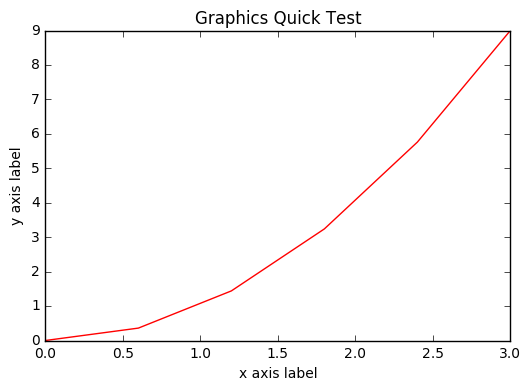

In [14]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0,3,6)
print(x)

y = np.power(x,2)
print(y)

plt.plot(x, y, 'r')
plt.xlabel('x axis label')
plt.ylabel('y axis label')
plt.title('Graphics Quick Test')
plt.show()

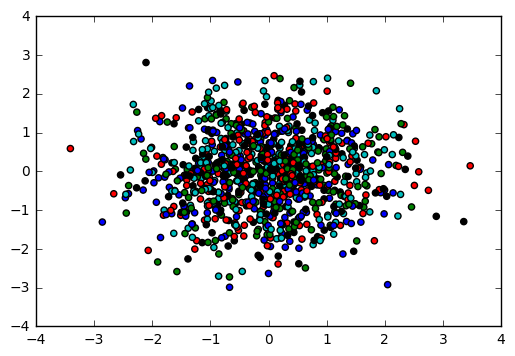

In [15]:
X = np.random.normal(0, 1, 1000)
Y = np.random.normal(0, 1, 1000)
plt.scatter(X, Y, c = ['b', 'g', 'k', 'r', 'c'])
plt.show()

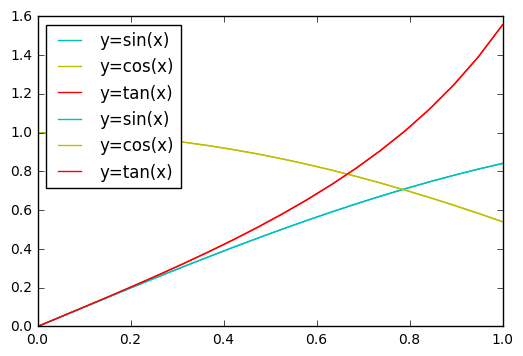

In [17]:
x = np.linspace(0, 1, 20)
y1 = np.sin(x)
y2 = np.cos(x)
y3 = np.tan(x)

plt.plot(x, y1, 'c', label='y=sin(x)')
plt.plot(x, y2, 'y', label='y=cos(x)')
plt.plot(x, y3, 'r', label='y=tan(x)')
plt.legend(loc='upper left')
plt.show()

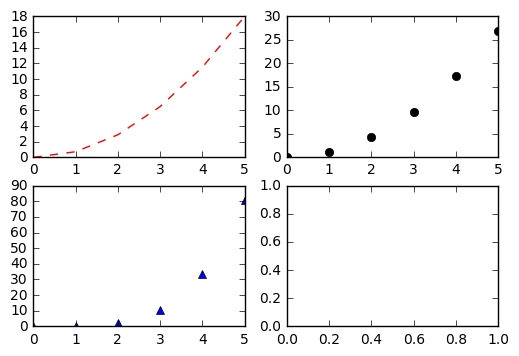

In [18]:
plt.figure('a') # define a figure, named 'a'
plt.subplot(221) # the first position of 4 subplots in 2x2 figure
plt.plot(y+y, 'r--')
plt.subplot(222) # the second position of 4 subplots
plt.plot(y*3, 'ko')
plt.subplot(223) # the third position of 4 subplots
plt.plot(y*y, 'b^')
plt.subplot(224)
plt.show()

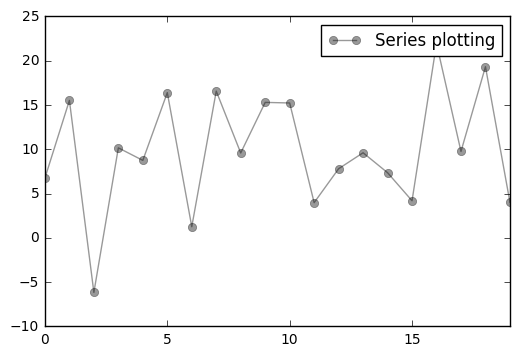

In [20]:
s = pd.Series(np.random.normal(10, 8, 20))

s.plot(style='ko-', alpha=0.4, label='Series plotting')
plt.legend()
plt.show()

## Data Analysis (an Addendum)
Data analysis can be seen as a process commposed of the following steps:
1. **Data Requirements** - define what kind of data will be collected to answer the question posed, or problem to be solved.
2. **Data Collection** - how to find and collect information to help solve our problem.
3. **Data Processing** - once data is obtained is must be processed (organised for analysis). There are performance considerations for this part of the data analysis process. What kind of databases, data structure should be used?
4. **Data Cleaning** - after being processed and organised, errors in the data may still remain or duplicates may exist. Techniques like record matching, deduplication can help. 
5. **Exploratory Data Analysis** - start to analyse and explore the data. Data Visualisation techniques can be really helpful in this part of the process.
6. **Modelling and Algorithms** - using machine learning techniques useful knowledge can be gained from the data and predictions can be made. 
7. **Data Product** - We then build data products that receive data input and generate output according to the problem to be solved. 